In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

fire_size_classes = pd.unique(df['fire_size_class'])
property = 'fire_size'
s_c = 'C'

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

df_sampled = df.loc[df['fire_size_class'] == s_c]

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(0, max_amount, num=20)
kde_values = kernel(x)


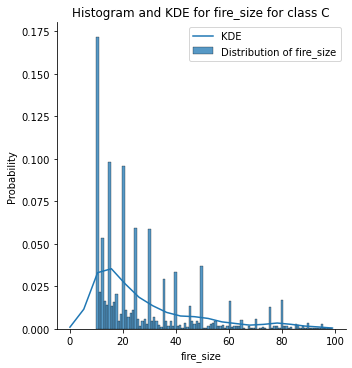

In [10]:
draw_hist_kde(df_sampled, x, s_c, property, kde_values, 100)

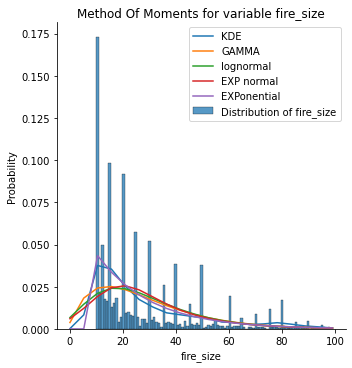

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9979725837334237, pvalue=2.753521859889624e-54), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.627943058136351, pvalue=5.981704020996403e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.978094802760029, pvalue=1.2941164456481278e-33), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.241056849495909, pvalue=1.6735834940106997e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9697689394976468, pvalue=8.130132895342163e-31), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.082867438884143, pvalue=9.436229575499055e-12)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


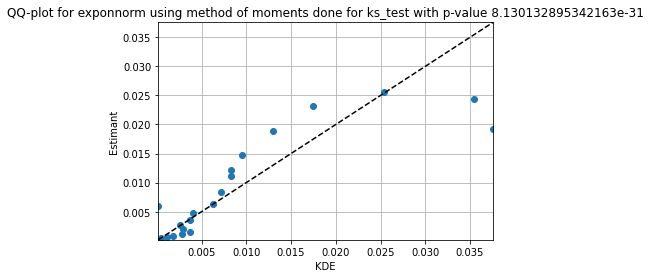

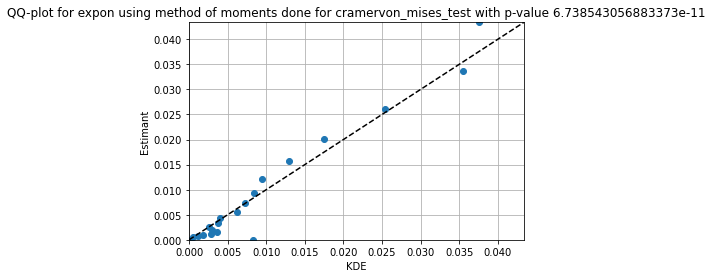

In [3]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 100)

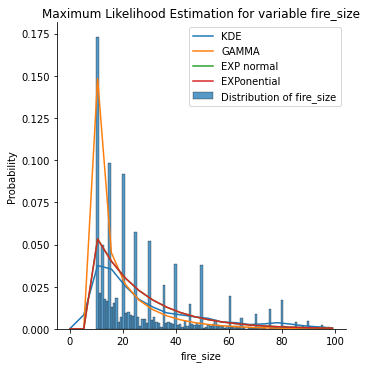

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


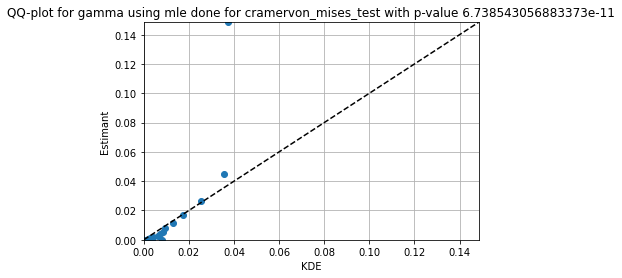

In [4]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 100)

[8.87567976e-06 2.82165364e+01 2.04654702e+01]
[ 6.69425947 21.00908499 20.41274783]


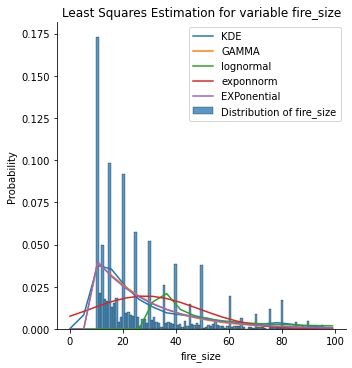

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9157302609983637, pvalue=6.523287570120357e-22), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.126011833784619, pvalue=6.443456879168252e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


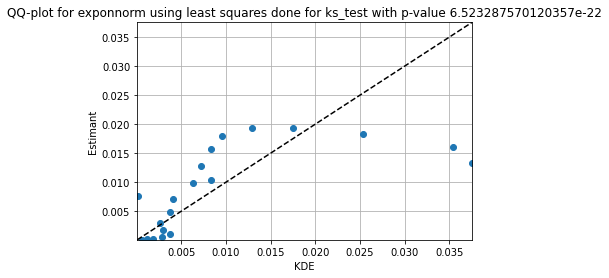

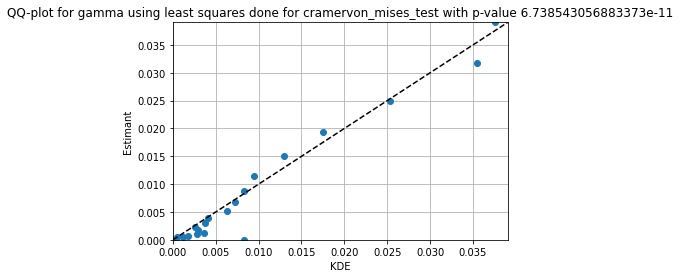

In [5]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 100)

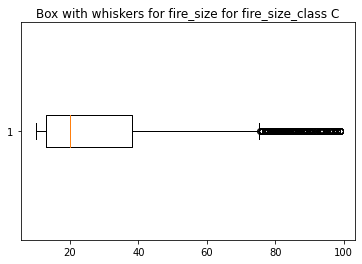

In [6]:
plt.boxplot(df_sampled[property], vert=False)
WHISKERS_FOLDER = './figures/whiskers/'
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()